# SafeNetRx Exploratory Data Analysis

### July to September 2017 Quarterly Report

Documents received
* Medications received
* Meds shipped
* Meds destroyed
* Local repository orders
* Donors
* Disease states
* Dispensing report
* Top 10 unfilled meds
* Pharmacy Initiative Reporting Tool

**Goal:** Read in data, calculate summary statistics, plot basic stats, look for outliers, and think of questions to answer with the data

In [1]:
# set up EDA

import pandas as pd #dataframes
import numpy as np #array manipulation
import matplotlib.pyplot as plt #basic plotting

%matplotlib inline 

## Meds In, Out, and Destroyed

Look at flow of medications through repository during Q1 <br>

In [2]:
meds_in = pd.read_csv('./Quarterly_Reports/2018Q1/meds_in_q1.csv') 
meds_in = meds_in.rename(index=str, columns={"?Item" : "Item"})

meds_in.head() #show first 5 columns of table

,Item,Quantity IN,Value IN
0,300 mL canister (with gel) for ACTIV.A.C. ther...,5,625.00
1,Abdominal Pad 8in X 7.5in,2,0.98
2,Abilify 10MG,28,999.04
3,Abilify Maintena 400mg/vial suspension,3,6756.45
4,Accu-chek Aviva Plus 50 test strips,2,49.40


In [3]:
meds_out = pd.read_csv('./Quarterly_Reports/2018Q1/meds_out_q1.csv')
meds_out = meds_out.rename(index=str, columns={"?Item" : "Item"})

meds_out.head()

,Item,Quantity OUT,Value OUT
0,Abdominal Pad 8in X 7.5in,2.0,0.98
1,Abilify 10MG,28.0,999.04
2,Accu-Check Aviva Plus Test Strips 50 ct,1.0,63.22
3,Accu-chek Aviva Plus 50 test strips,2.0,49.40
4,Accu-Chek FastClix Lancet 100+2,1.0,11.28


In [4]:
meds_des = pd.read_csv('./Quarterly_Reports/2018Q1/meds_des_q1.csv')
meds_des = meds_des.rename(index=str, columns={"?Item" : "Item"})

meds_des.head()

,Item,Quantity DES,Value DES
0,Acyclovir 400MG (Zovirax),1,-2.17
1,Allopurinol 100MG (Zyloprim),2,-0.96
2,"Amiodarone 200MG (Cordarone, Pacerone)",1,-3.30
3,Amlodipine 5MG (Norvasc),2,-3.46
4,Amlodipine-Atorvastatin 10-20mg (Caduet ),18,-168.66


In [5]:
meds = pd.merge(meds_in, meds_out, how='outer', on='Item') #outer join in, out so no rows lost
meds = pd.merge(meds, meds_des, how='outer', on='Item') #add in destroyed data
meds = meds.fillna(0) #replace NaN missing values from outer join with 0
meds['Quantity NET'] = meds['Quantity IN'] - meds['Quantity OUT'] #add column for net change in quantity #ignores destroyed
meds['Unit Price'] = meds['Value IN']/meds['Quantity IN'] #add column for unit price

meds #complete inventory table

,Item,Quantity IN,Value IN,Quantity OUT,Value OUT,Quantity DES,Value DES,Quantity NET,Unit Price
0,300 mL canister (with gel) for ACTIV.A.C. ther...,5.0,625.00,0.0,0.00,0.0,0.00,5.0,125.00
1,Abdominal Pad 8in X 7.5in,2.0,0.98,2.0,0.98,0.0,0.00,0.0,0.49
2,Abilify 10MG,28.0,999.04,28.0,999.04,0.0,0.00,0.0,35.68
3,Abilify Maintena 400mg/vial suspension,3.0,6756.45,0.0,0.00,0.0,0.00,3.0,2252.15
4,Accu-chek Aviva Plus 50 test strips,2.0,49.40,2.0,49.40,0.0,0.00,0.0,24.70
5,Accu-Chek Softclix Lancet 100ct Box,5.0,57.70,4.0,46.16,0.0,0.00,1.0,11.54
6,"Ace Bandage 6""",2.0,15.98,2.0,15.98,0.0,0.00,0.0,7.99
7,Acetaminophen 325MG (Tylenol),1666.0,66.64,1307.0,52.28,0.0,0.00,359.0,0.04
8,Acetaminophen 500MG (Tylenol),966.0,28.98,993.0,29.79,0.0,0.00,-27.0,0.03
9,Acetaminophen 650MG ER (8HR) (Tylenol Arthriti...,520.0,374.40,429.0,308.88,0.0,0.00,91.0,0.72


In [6]:
meds['Quantity NET'].describe()

count    1017.000000
mean       13.543756
std       312.126697
min     -1980.000000
25%        -4.000000
50%         0.000000
75%         1.000000
max      3922.000000
Name: Quantity NET, dtype: float64

Text(0.5,1,'Net Change in Drug Quantity at end of Q1')

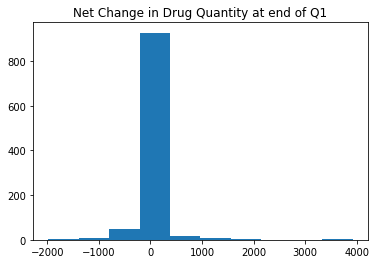

In [7]:
plt.hist(meds['Quantity NET'])
plt.title("Net Change in Drug Quantity at end of Q1")

In [8]:
meds['Unit Price'].mean()

24.797744919410032

In [9]:
# filter for meds where quantity out > quantity in, i.e. net < 0 

filter_need = meds['Quantity NET'] < 0
meds_need = meds[filter_need]

meds_need

,Item,Quantity IN,Value IN,Quantity OUT,Value OUT,Quantity DES,Value DES,Quantity NET,Unit Price
8,Acetaminophen 500MG (Tylenol),966.0,28.98,993.0,29.79,0.0,0.00,-27.0,0.03
12,Acyclovir 400MG (Zovirax),499.0,1082.83,542.0,1176.14,1.0,-2.17,-43.0,2.17
17,Advair Diskus 500-50MCG (Fluticasone/Salmetero...,13.0,4575.22,15.0,5279.10,0.0,0.00,-2.0,351.94
23,Alendronate Sodium 70MG Tablet (Fosamax),65.0,1331.85,75.0,1536.75,0.0,0.00,-10.0,20.49
27,"Amiodarone 200MG (Cordarone, Pacerone)",812.0,2679.60,826.0,2725.80,1.0,-3.30,-14.0,3.30
28,"Amiodarone 200MG (Cordarone, Pacerone)",812.0,2679.60,826.0,2725.80,2.0,-6.60,-14.0,3.30
29,Amitiza 24MCG,32.0,224.00,284.0,1988.00,0.0,0.00,-252.0,7.00
30,Amitiza 8MCG,32.0,224.00,68.0,476.00,0.0,0.00,-36.0,7.00
31,Amitriptyline 100MG (Elavil),14.0,35.56,52.0,132.08,0.0,0.00,-38.0,2.54
37,Amlodipine 10MG (Norvasc),3512.0,8323.44,3762.0,8915.94,3.0,-7.11,-250.0,2.37


In [10]:
meds_need['Unit Price'].mean()

17.940100209615675

In [11]:
disease = pd.read_csv('./Quarterly_Reports/2018Q1/disease_q1.csv')
disease.columns = disease.iloc[0]
disease = disease.reindex(disease.index.drop([0])).drop([11,12,13,14,15,16])
disease

,Medication Class,Units,% Units,Value,% Value
1,Anti-Cancer Meds,1344,0.4%,"$244,175.98",17.0%
2,Antipsychotic Meds,11057,3.2%,"$144,475.58",10.0%
3,Antidepressant Meds,36456,10.6%,"$136,786.53",9.5%
4,Cholesterol Lowering Agents,22089,6.4%,"$111,697.46",7.8%
5,Gastrointestinal Meds,22899,6.6%,"$106,367.19",7.4%
6,Blood Modifiers,13279,3.9%,"$93,505.34",6.5%
7,Asthma/COPD,8072,2.3%,"$87,872.91",6.1%
8,Antihypertensive Meds,61662,17.9%,"$82,780.41",5.8%
9,Anti-Seizure Meds,28125,8.2%,"$60,097.44",4.2%
10,Anti-Nausea Meds,1876,0.5%,"$45,442.58",3.2%


## Meds In, Out, Destroyed: Results

For most drugs, quantity in = quantity out. 

Tagged drugs where "quantity out" was greater than "quantity in" as "meds needed." Found that for Q1 average unit price of meds needed (18) was lower than average unit price of all meds received (24).

For reference, the top 10 unfilled drugs:
1. Abilify 5MG, 10MG
2. Quetiapine 200MG, 300MG, 400MG
3. Albuterol Inhaler (Ventolin HFA, ProAir HFA, Proventil)
4. Spiriva capsules with inhalation device
5. Metformin ER 500MG
6. Diabetic test strips
7. Pristiq 100 MG
8. Advair 250/50
9. Vesicare 10MG
10. Propranolol 20MG

Questions:
* How are requests (and, by extension, unfilled requests) tracked? 
* When there are two rows for the same drug in the "destroyed" table, does that indicate two batches of the same drug with different expiration dates or from different donors?

Next steps: 
1. Track inventory of individual drugs over time; annotate timeline with events that affected availability. Need quarterly reports since 2008 to track each medication in the inventory over time. Need to clean up data to remove duplicate entries.

2. Make master data table with drug name, disease state, units in and out each quarter, requests made and requests filled in each quarter, and price in each quarter. This would allow clustering of drug info along multiple dimensions. (Possible predictive power.)

**The Knight Lab at Northwestern made an interactive tool to produce annotated line charts. See storyline.knightlab.com for more examples.**

<img src="https://storyline.knightlab.com/screenshot-storyline.png" width="600" height="480" />

## Dispensaries and Donors

Look at where meds are coming from and where they are going. 

In [12]:
dispense_q1 = pd.read_csv('./Quarterly_Reports/2018Q1/dispense_q1.csv') #names of dispensaries and transaction counts
dispense_q1 = dispense_q1.drop(['Unnamed: 3'], axis=1) #cleaning up table
repo = pd.read_csv('./Quarterly_Reports/2018Q1/repository_orders_q1.csv') #names of dispensaries and patients, doses
repo = repo.rename(index=str, columns={"?Name" : "Name"}) #cleaning up table
dispense = pd.merge(dispense_q1, repo, how='outer', on='Name') #merging transaction counts, patients, and doses
dispense = dispense.drop([121, 125],axis=0) #dropping totals column and empty column at end

dispense #complete table for dispensary data in quarterly report

,Name,Pts,Doses,Transaction Count
0,ACE-SAP Clinic,40,1896,3
1,Adair County Health System,6,280,2
2,All Care Health Center (Council Bluffs CHC),333,23192,18
3,Avera Spencer Family Care,132,26540,126
4,Avera Spirit Lake Medical Center,108,24643,103
5,Berryhill Psychiatry,5,260,1
6,Boone Free Medical Clinic,52,"14,609",4
7,Bridgeview Community Mental Health,14,1077,4
8,Broadlawns Medical - Dr Shah,6,18,4
9,Broadlawns Medical Center - Family Health Ctr,1,775,1


In [13]:
#converting all values to floating point numbers that can be used for math, computing descriptive states

dispense['Pts'] = pd.to_numeric(dispense['Pts'])
dispense['Doses'] = dispense['Doses'].str.replace(",","")
dispense['Doses'] = pd.to_numeric(dispense['Doses'])
dispense['Transaction Count'] = pd.to_numeric(dispense['Transaction Count'])
dispense = dispense.fillna(0)

In [14]:
dispense.describe()

,Pts,Doses,Transaction Count
count,124.000000,124.000000,124.000000
mean,23.129032,2635.903226,8.524194
std,49.450964,5646.768371,23.852345
min,0.000000,0.000000,0.000000
25%,2.000000,215.750000,1.000000
50%,5.000000,711.000000,3.000000
75%,18.750000,2515.000000,6.000000
max,333.000000,39839.000000,213.000000


Text(0.5,1,'Histogram of Transaction Counts Reported by Each Dispensary')

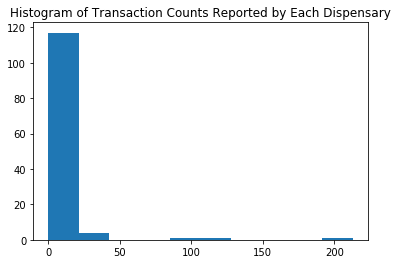

In [15]:
plt.hist(dispense['Transaction Count'])
plt.title("Histogram of Transaction Counts Reported by Each Dispensary")

Text(0.5,1,'Histogram of Patient Counts Reported by Each Dispensary')

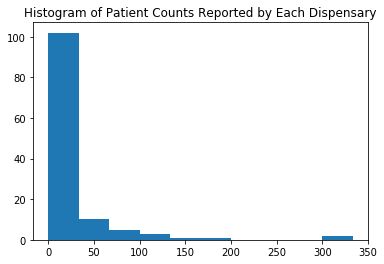

In [16]:
plt.hist(dispense['Pts'])
plt.title("Histogram of Patient Counts Reported by Each Dispensary")

Text(0.5,1,'Histogram of Doses Requested by Each Dispensary')

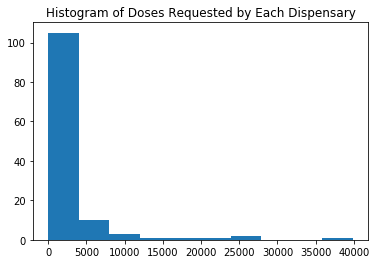

In [17]:
plt.hist(dispense['Doses'])
plt.title("Histogram of Doses Requested by Each Dispensary")

Text(0,0.5,'Transactions')

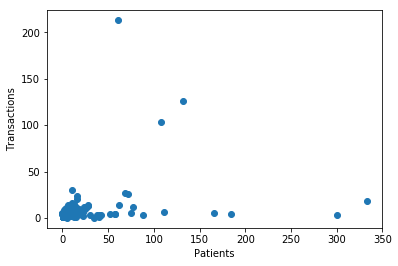

In [18]:
plt.scatter(dispense['Pts'],dispense['Transaction Count'])
plt.xlabel("Patients")
plt.ylabel("Transactions")

Text(0,0.5,'Doses')

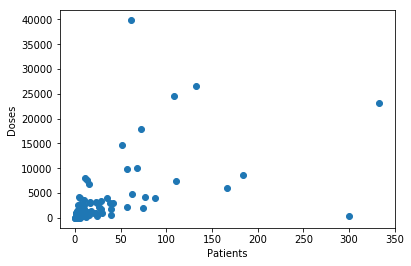

In [19]:
plt.scatter(dispense['Pts'],dispense['Doses'])
plt.xlabel("Patients")
plt.ylabel("Doses")

Text(0,0.5,'Doses')

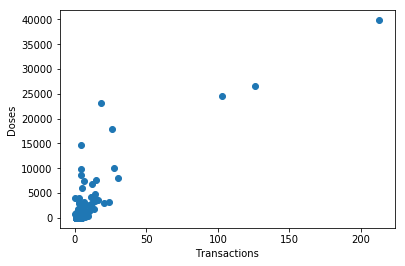

In [20]:
plt.scatter(dispense['Transaction Count'],dispense['Doses'])
plt.xlabel("Transactions")
plt.ylabel("Doses")

In [21]:
filter_high_dose = dispense['Doses'] > 5000
dispense_high_dose = dispense[filter_high_dose]

filter_high_pts = dispense['Pts'] > 50
dispense_high_pts = dispense[filter_high_pts]

In [22]:
dispense_high_dose #dispensaries that requested the largest # of doses

,Name,Pts,Doses,Transaction Count
2,All Care Health Center (Council Bluffs CHC),333.0,23192.0,18.0
3,Avera Spencer Family Care,132.0,26540.0,126.0
4,Avera Spirit Lake Medical Center,108.0,24643.0,103.0
6,Boone Free Medical Clinic,52.0,14609.0,4.0
13,Carroll Community & New Opportunities Free Clinic,68.0,10052.0,27.0
20,Community Health Free Clinic,111.0,7350.0,6.0
48,Iowa Heart Center,72.0,17932.0,26.0
52,La Clinica de la Esperanza,184.0,8746.0,4.0
62,Medicap Pharmacy Osceola,11.0,7954.0,30.0
63,Medicap Pharmacy Urbandale,61.0,39839.0,213.0


In [23]:
dispense_high_pts #dispensaries with the largest number of patients

,Name,Pts,Doses,Transaction Count
2,All Care Health Center (Council Bluffs CHC),333.0,23192.0,18.0
3,Avera Spencer Family Care,132.0,26540.0,126.0
4,Avera Spirit Lake Medical Center,108.0,24643.0,103.0
6,Boone Free Medical Clinic,52.0,14609.0,4.0
13,Carroll Community & New Opportunities Free Clinic,68.0,10052.0,27.0
20,Community Health Free Clinic,111.0,7350.0,6.0
25,Des Moines Retina Associates,300.0,400.0,3.0
47,Iowa City Free Medical Clinic,88.0,4020.0,3.0
48,Iowa Heart Center,72.0,17932.0,26.0
52,La Clinica de la Esperanza,184.0,8746.0,4.0


## Dispensaries: Results

Each histogram (patients, doses, transactions) has a long tail. Most dispensaries are making a small number of requests for a small number of patients, but some dispensaries are making very large requests. What do we know about these outliers? (Listed above)

If we plot transactions vs. doses, we see a roughly linear relationship, which makes sense.

If we plot patients vs. doses, we see that the data is not linear, but splays out along the axis. Some dispensaries have relatively small numbers of patients but request high doses, and others have a large number of patients but request a small number of doses. What do we know about these outliers? Are they outliers every quarter?

Questions:
* Are patients unique or can they repeat across multiple transactions? For example, are there 300 patients at Des Moines Retina Associates, each of whom shows up on one of 3 transactions or are there 100 patients that show up on all 3 transactions? 

Next steps:
1. Track which medicines (and corresponding disease states) are going to which dispensary. This could be used to identify geographic pockets of need.
2. Map dispensaries and their area of impact. Compare to population density. Identify areas that are underserved. 

**Below is an example of the kind of mapping tool we could use to look at a dispensary's area of impact by calculating its distance from other dispensaries in the SafeNetRx network using Voronoi tessallation.**

<img src="http://i.imgur.com/N33uY3a.jpg" height="480" width="600"/>

## Donors

Who is donating medications? 

In [24]:
donors = pd.read_csv('./Quarterly_Reports/2018Q1/donors_q1.csv')
donors = donors.drop(['Unnamed: 4','Unnamed: 5'], axis=1)
donors 

,Organization,City,State,Facility Type
0,All Care Health Center,Council Bluffs,IA,Federally Qualified Health Center
1,Amana Society Pharmacy,Amana,IA,Community/Retail
2,Ankeny Community Pharmacy,Ankeny,IA,Community/Retail
3,Black Hawk County Health,Waterloo,IA,Public Health Department
4,Blank Cancer and Blood Disorder Center,Des Moines,IA,Cancer Treatment Center
5,Boone Free Medical Clinic,Boone,IA,Free Medical Center
6,Broadlawns Medical Center - Oncology,Des Moines,IA,Oncology Center
7,Buchanan County Public Health Dept,Independence,IA,Public Health Department
8,Buena Vista County Public Health,Storm Lake,IA,Public Health Department
9,Burgess Health Center,Onawa,IA,Critical Access Hospital


## Donors: Results

The quarterly report only contained the names of donor institutions. To do more quantitative analysis, I would need receipts from each donor with the type and quantity of drugs donated. 

With that information (and information from the dispensaries), I can make a Sankey diagram visualizing the flow of medication from donors to dispensaries. This could be done along different variables, depending on what is most useful for SafeNetRx's mission.

For example, when reporting to a specific donor, we can diagram the volume of each medication donated and where it went. Alternatively, we can choose a specific drug, and diagram which donors it came from and where it went. 

**Well known example of a Sankey diagram.**

<img src="http://www.sankey-diagrams.com/wp-content/gallery/x_sankey_005/us_energy_2025.png" width="600" height="480"/>

# Mapping

I quickly added the donor and dispensary names to a Google map and let it guess the locations. There are clearly some errors since the dispensary information only had names, while the donor list also had cities. 

If we move forward with a project that requires mapping, I would need exact addresses for each donor and dispensary. I describe possible mapping projects in the dispensary section above. 

In [25]:
%%html
<iframe src="https://www.google.com/maps/d/embed?mid=1IgW7XaOnJ7xIpgvXWjXE37JVmvB7C6WH" width="640" height="480"></iframe>%%!